In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
def create_df(size : int, sdv : float, displacement : np.ndarray = None):
    return (np.random.normal(scale = sdv, size = (size, 2)) + displacement)

In [96]:
size_s1 = 120
size_s2 = 120
sdv_s1 = 1
sdv_s2 = 1
print(f"We will create the first group of size {size_s1} and standard deviation {sdv_s1}")
print(f"We will create the first group of size {size_s2} and standard deviation {sdv_s2}")

We will create the first group of size 120 and standard deviation 1
We will create the first group of size 120 and standard deviation 1


In [97]:
m1 = create_df(size = size_s1, sdv = sdv_s1, displacement = np.array([1, 1]))
m2 = create_df(size = size_s2, sdv = sdv_s2, displacement = np.array([2, 2]))

In [98]:
def plot_graphic(*args, test_points: bool = False, simple_plot: bool = False, labels: bool = False):
    cmap = plt.get_cmap("plasma")
    
    # Generate colors based on the number of args
    if test_points:
        num_colors = len(args) - 1  # One less for test points
    else:
        num_colors = len(args)
    
    colors = [cmap(i / num_colors) for i in range(num_colors)]
    
    if simple_plot:
        for i, matrix in enumerate(args):
            if test_points == True and i == len(args) - 1:
                # Handle test points
                if labels == True:
                    for j in range(matrix.shape[0]):
                        if matrix[j, 2] == 1:
                            plt.scatter(matrix[j, 0], matrix[j, 1], color=colors[0], s=100)
                        else:
                            plt.scatter(matrix[j, 0], matrix[j, 1], color=colors[1], s=100)
                else:
                    plt.scatter(matrix[:, 0], matrix[:, 1], color="black", s=100, label = "test data")
            else:
                plt.scatter(matrix[:, 0], matrix[:, 1], color=colors[i], label=f'Dataset {i + 1}')

        plt.title("Points of Dataset")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.legend()
        plt.show()


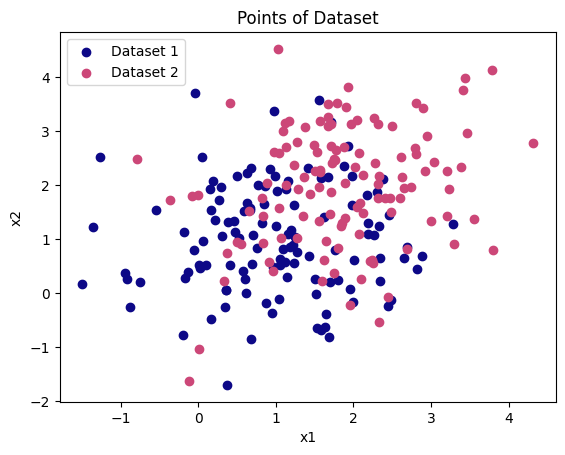

In [99]:
plot_graphic(m1, m2, simple_plot = True)

In [100]:
l1 = np.ones(shape = (size_s1, 1))
l2 = -1*np.ones(shape = (size_s2, 1))

print("Now we will concatenate the labels with my matrix of values.")

def concatenate_x(*args):
    return np.concatenate([matrix for i, matrix in enumerate(args)], axis = 0)
    
matrix = concatenate_x(m1, m2)

labels = concatenate_x(l1, l2)

def concatenate_y(*args):
    return np.concatenate([labels for i, labels in enumerate(args)], axis = 1)
    
matrix = concatenate_y(matrix, labels)

Now we will concatenate the labels with my matrix of values.


In [101]:
matrix_df = pd.DataFrame(data = matrix, columns = ["x1", "x2", "labels"])
matrix_df.head()

,x1,x2,labels
0,0.501923,2.170486,1.0
1,-0.922723,0.261370,1.0
2,0.208458,1.357110,1.0
3,2.488770,-0.123445,1.0
4,0.524904,1.026863,1.0


In [102]:
unique, counts = np.unique(np.array(matrix_df.iloc[:, -1]), return_counts = True)
print(dict(zip(unique, counts)))

{-1.0: 120, 1.0: 120}


In [103]:
import math
def gaussian_kernel(distance, bandwidth = 1.0):
    return np.exp(- (distance ** 2) / (2 * bandwidth ** 2)) / math.sqrt(2 * math.pi)

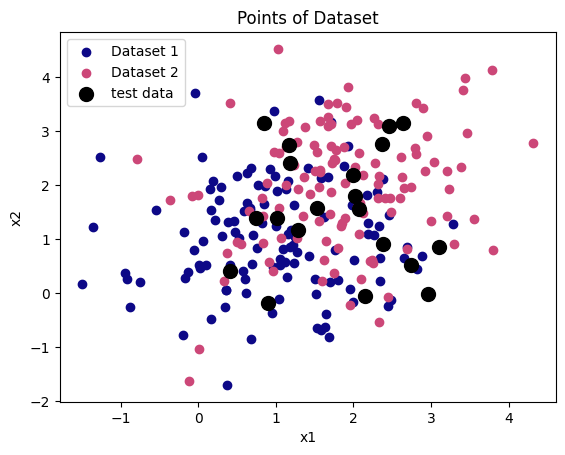

In [104]:
new_points = create_df(size = 20, sdv = 1, displacement = np.array(object = [1.5, 1.5]))
plot_graphic(m1, m2, new_points, simple_plot = True, test_points = True)

In [117]:
def new_space(matrix: np.ndarray, new_points: np.ndarray, K: int = None):
    if K is None or K <= 0 or K/2 == 0:
        raise ValueError("The K value must be a positive integer and odd.")
    Q1 = []
    Q2 = []
    for point in new_points:
        h = 1
        distances = np.linalg.norm(matrix[:, : -1] - point, axis = 1) # Taking all distances.
        
        nearest_indices = np.argsort(distances)[:K] # Sorting the distances and taking the index of the K nearests.
        Q1_sum = 0
        Q2_sum = 0
        
        for i in (nearest_indices):
            if matrix[i, -1] >= 0 :
                Q1_sum += gaussian_kernel(distances[i], h) # Taking the Q1 value.
            else:
                Q2_sum += gaussian_kernel(distances[i], h) # Taking the Q2 value.
        Q1.append(Q1_sum)
        Q2.append(Q2_sum)
    return (Q1, Q2)

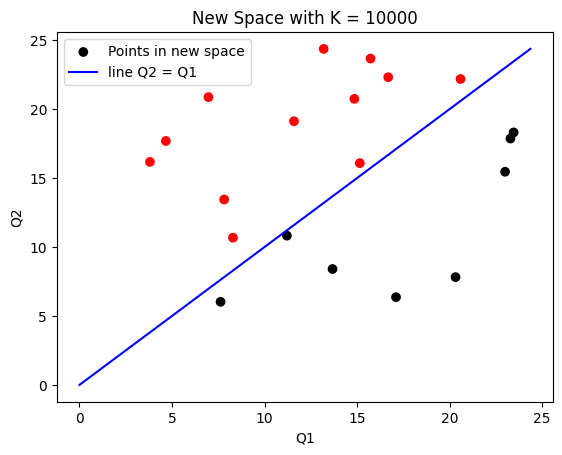

In [137]:
K = 10000
Q1, Q2 = new_space(matrix = matrix, new_points = new_points, K = K)
aux = np.concatenate((Q1, Q2), axis = 0)

x = np.linspace(start = 0, stop = np.max(aux), num = 100)
y = x

colors = np.where(np.array(Q2) > np.array(Q1), "red", "black")
plt.scatter(Q1, Q2, color = colors, label = "Points in new space")
plt.plot(y, x, color = 'blue', label = "line Q2 = Q1")
plt.title(f"New Space with K = {K}")
plt.xlabel("Q1")
plt.ylabel("Q2")
plt.legend()
plt.show()